## Import libraries and read in .csv file

In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from IPython.display import display

data = pd.read_csv('Weekly_counts_of_death_by_jurisdiction_and_cause_of_death.csv', low_memory=False)

## Data cleanup
### Drop uneeded columns

In [17]:
data.drop('Week Ending Date', axis = 1, inplace = True)
data.drop('Week', axis = 1, inplace = True)
data.drop('Cause Subgroup', axis = 1, inplace = True)
data.drop('Time Period', axis = 1, inplace = True)
data.drop('Suppress', axis = 1, inplace = True)
data.drop('Note', axis = 1, inplace = True)
data.drop('Average Number of Deaths in Time Period', axis = 1, inplace = True)
data.drop('Difference from 2015-2019 to 2020', axis = 1, inplace = True)
data.drop('Percent Difference from 2015-2019 to 2020', axis = 1, inplace = True)
data.drop('Type', axis = 1, inplace = True)

### Drop rows with missing values in column 'Number of Deaths'

In [18]:
display(data.isnull().sum())
data['Number of Deaths'].isnull().sum()
data = data.dropna(subset = ["Number of Deaths"])
display(data.isnull().sum())

Jurisdiction           0
State Abbreviation     0
Year                   0
Cause Group            0
Number of Deaths      34
dtype: int64

Jurisdiction          0
State Abbreviation    0
Year                  0
Cause Group           0
Number of Deaths      0
dtype: int64

In [19]:
data.head()

,Jurisdiction,State Abbreviation,Year,Cause Group,Number of Deaths
0,Alabama,AL,2015,Alzheimer disease and dementia,120.0
1,Alabama,AL,2015,Alzheimer disease and dementia,120.0
2,Alabama,AL,2016,Alzheimer disease and dementia,76.0
3,Alabama,AL,2016,Alzheimer disease and dementia,76.0
4,Alabama,AL,2017,Alzheimer disease and dementia,96.0


### Change column names

In [20]:
data.columns = ['State/territory', 'StateAbbreviation', 'Year', 'CauseGroup', 'NumberOfDeaths']

In [21]:
data.dtypes

State/territory       object
StateAbbreviation     object
Year                   int64
CauseGroup            object
NumberOfDeaths       float64
dtype: object

### Convert NumberOfDeaths from float to int

In [22]:
data = data.astype({'NumberOfDeaths':'int'})
data.dtypes

State/territory      object
StateAbbreviation    object
Year                  int64
CauseGroup           object
NumberOfDeaths        int64
dtype: object

## Data analysis
### Seperate data by year

In [23]:
df_2015 = data[data.Year == 2015].reset_index(drop = True)
df_2016 = data[data.Year == 2016].reset_index(drop = True)
df_2017 = data[data.Year == 2017].reset_index(drop = True)
df_2018 = data[data.Year == 2018].reset_index(drop = True)
df_2019 = data[data.Year == 2019].reset_index(drop = True)
df_2020 = data[data.Year == 2020].reset_index(drop = True)


### Sum total number of deaths and total number of deaths per year

In [24]:
totalDeaths_all = int(sum(data['NumberOfDeaths']))

sum_2015 = int(sum(df_2015["NumberOfDeaths"]))
sum_2016 = int(sum(df_2016["NumberOfDeaths"]))
sum_2017 = int(sum(df_2017["NumberOfDeaths"]))
sum_2018 = int(sum(df_2018["NumberOfDeaths"]))
sum_2019 = int(sum(df_2019["NumberOfDeaths"]))
sum_2020 = int(sum(df_2020["NumberOfDeaths"]))


### Create dataframe of years and deaths

,Year,Deaths,Rate
0,2015,8388330,0.16125
1,2016,8418548,0.16184
2,2017,8645986,0.16621
3,2018,8733140,0.16788
4,2019,8727262,0.16777
5,2020,9105809,0.17505


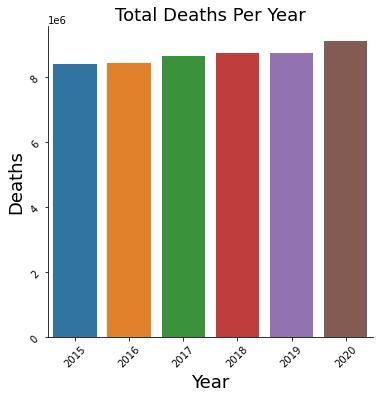

In [25]:
years = ['2015', '2016', '2017', '2018', '2019', '2020', 'Total']
deaths = [sum_2015, sum_2016, sum_2017, sum_2018, sum_2019, sum_2020, totalDeaths_all]
rate = [round(sum_2015/totalDeaths_all, 5), round(sum_2016/totalDeaths_all, 5),
        round(sum_2017/totalDeaths_all, 5), round(sum_2018/totalDeaths_all, 5),
        round(sum_2019/totalDeaths_all, 5), round(sum_2020/totalDeaths_all, 5)]

rateSum = sum(rate)
rate.append(rateSum)

df_deaths = np.array([years, deaths, rate]).T
df_deaths = df_deaths.reshape(7,3)
df_deaths = pd.DataFrame(df_deaths)
df_deaths.columns = ['Year', 'Deaths', 'Rate']

df_ndeaths = df_deaths

df_ndeaths.drop(df_ndeaths.tail(1).index,inplace=True) # drop first n rows

# convert column "a" of a DataFrame
df_ndeaths['Year'] = pd.to_numeric(df_ndeaths['Year'])
df_ndeaths['Deaths'] = pd.to_numeric(df_ndeaths['Deaths'])

display(df_ndeaths)

sns.catplot(x = 'Year', y = 'Deaths', kind = 'bar', data = df_ndeaths)
plt.title("Total Deaths Per Year", size=18)
plt.xlabel("Year", size=18)
plt.ylabel("Deaths", size=18)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


### Deaths by cause and year

,Year,Alzheimer,Malignant,Respiratory,Circulatory,Other,Total
0,2015,978278,2381810,1062942,3314302,650998,8388330
1,2016,994914,2390754,1046110,3333214,653556,8418548
2,2017,1047324,2403926,1100342,3419926,674468,8645986
3,2018,1067976,2404396,1117264,3460880,682624,8733140
4,2019,1086700,2406090,1068318,3482152,684002,8727262
5,2020,1219705,2415926,1066075,3660848,743255,9105809


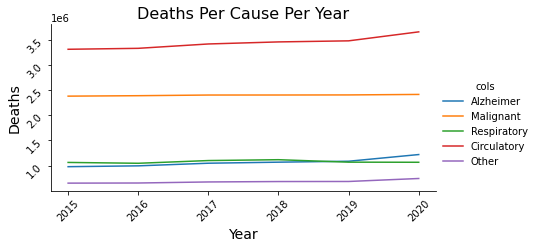

In [26]:
deathsAlzheimer_2015 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2015")['NumberOfDeaths'].sum())
deathsMalignant_2015 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2015")['NumberOfDeaths'].sum())
deathsRespiratory_2015 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2015")['NumberOfDeaths'].sum())
deathsCirculatory_2015 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2015")['NumberOfDeaths'].sum())
deathsOther_2015 = int(data.query("CauseGroup == 'Other select causes' and Year == 2015")['NumberOfDeaths'].sum())

deathsAlzheimer_2016 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2016")['NumberOfDeaths'].sum())
deathsMalignant_2016 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2016")['NumberOfDeaths'].sum())
deathsRespiratory_2016 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2016")['NumberOfDeaths'].sum())
deathsCirculatory_2016 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2016")['NumberOfDeaths'].sum())
deathsOther_2016 = int(data.query("CauseGroup == 'Other select causes' and Year == 2016")['NumberOfDeaths'].sum())

deathsAlzheimer_2017 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2017")['NumberOfDeaths'].sum())
deathsMalignant_2017 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2017")['NumberOfDeaths'].sum())
deathsRespiratory_2017 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2017")['NumberOfDeaths'].sum())
deathsCirculatory_2017 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2017")['NumberOfDeaths'].sum())
deathsOther_2017 = int(data.query("CauseGroup == 'Other select causes' and Year == 2017")['NumberOfDeaths'].sum())

deathsAlzheimer_2018 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2018")['NumberOfDeaths'].sum())
deathsMalignant_2018 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2018")['NumberOfDeaths'].sum())
deathsRespiratory_2018 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2018")['NumberOfDeaths'].sum())
deathsCirculatory_2018 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2018")['NumberOfDeaths'].sum())
deathsOther_2018 = int(data.query("CauseGroup == 'Other select causes' and Year == 2018")['NumberOfDeaths'].sum())

deathsAlzheimer_2019 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2019")['NumberOfDeaths'].sum())
deathsMalignant_2019 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2019")['NumberOfDeaths'].sum())
deathsRespiratory_2019 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2019")['NumberOfDeaths'].sum())
deathsCirculatory_2019 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2019")['NumberOfDeaths'].sum())
deathsOther_2019 = int(data.query("CauseGroup == 'Other select causes' and Year == 2019")['NumberOfDeaths'].sum())

deathsAlzheimer_2020 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2020")['NumberOfDeaths'].sum())
deathsMalignant_2020 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2020")['NumberOfDeaths'].sum())
deathsRespiratory_2020 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2020")['NumberOfDeaths'].sum())
deathsCirculatory_2020 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2020")['NumberOfDeaths'].sum())
deathsOther_2020 = int(data.query("CauseGroup == 'Other select causes' and Year == 2020")['NumberOfDeaths'].sum())

array_2015 = [2015, deathsAlzheimer_2015, deathsMalignant_2015, deathsRespiratory_2015, deathsCirculatory_2015, deathsOther_2015, sum_2015]
array_2016 = [2016, deathsAlzheimer_2016, deathsMalignant_2016, deathsRespiratory_2016, deathsCirculatory_2016, deathsOther_2016, sum_2016]
array_2017 = [2017, deathsAlzheimer_2017, deathsMalignant_2017, deathsRespiratory_2017, deathsCirculatory_2017, deathsOther_2017, sum_2017]
array_2018 = [2018, deathsAlzheimer_2018, deathsMalignant_2018, deathsRespiratory_2018, deathsCirculatory_2018, deathsOther_2018, sum_2018]
array_2019 = [2019, deathsAlzheimer_2019, deathsMalignant_2019, deathsRespiratory_2019, deathsCirculatory_2019, deathsOther_2019, sum_2019]
array_2020 = [2020, deathsAlzheimer_2020, deathsMalignant_2020, deathsRespiratory_2020, deathsCirculatory_2020, deathsOther_2020, sum_2020]

df_deathsCausePerYear = pd.DataFrame([array_2015, array_2016, array_2017, array_2018, array_2019, array_2020])

df_deathsCausePerYear.columns = ['Year', 'Alzheimer', 'Malignant', 'Respiratory', 'Circulatory', 'Other', 'Total']

display(df_deathsCausePerYear)

df_catPerYear = df_deathsCausePerYear.iloc[:,:-1]

df_catPerYear = df_catPerYear.melt('Year', var_name='cols', value_name='vals')

sns.relplot(x = 'Year', y = 'vals', hue = 'cols', kind = 'line', height=3, aspect=2, data = df_catPerYear)
plt.title("Deaths Per Cause Per Year", size=16)
plt.xlabel("Year", size=14)
plt.ylabel("Deaths", size=14)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


### Total deaths by cause

,Cause,Deaths,Rate
0,Circulatory,20671322,0.3974
1,Malignant,14402902,0.2769
2,Respiratory,6461051,0.1242
3,Alzheimer,6394897,0.1229
4,Other,4088903,0.0786


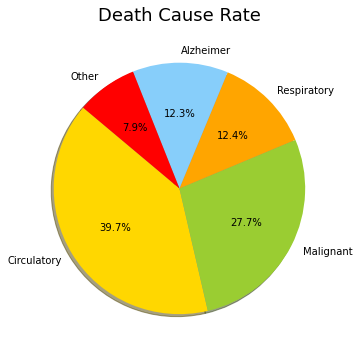

In [27]:
deaths_alzheimer = int(data.loc[data['CauseGroup'] == 'Alzheimer disease and dementia', 'NumberOfDeaths'].sum())
deaths_malignant = int(data.loc[data['CauseGroup'] == 'Malignant neoplasms', 'NumberOfDeaths'].sum())
deaths_respiratory = int(data.loc[data['CauseGroup'] == 'Respiratory diseases', 'NumberOfDeaths'].sum())
deaths_circulatory = int(data.loc[data['CauseGroup'] == 'Circulatory diseases', 'NumberOfDeaths'].sum())
deaths_other = int(data.loc[data['CauseGroup'] == 'Other select causes', 'NumberOfDeaths'].sum())

array_circulatory = ['Circulatory', deaths_circulatory, round(deaths_circulatory/totalDeaths_all, 4)]
array_malignant = ['Malignant', deaths_malignant, round(deaths_malignant/totalDeaths_all, 4)]
array_respiratory = ['Respiratory', deaths_respiratory, round(deaths_respiratory/totalDeaths_all, 4)]
array_alzheimer = ['Alzheimer', deaths_alzheimer, round(deaths_alzheimer/totalDeaths_all, 4)]
array_other = ['Other', deaths_other, round(deaths_other/totalDeaths_all, 4)]

df_cause = pd.DataFrame([array_circulatory, array_malignant, array_respiratory, array_alzheimer, array_other])

df_cause.columns = ['Cause', 'Deaths', 'Rate']

display(df_cause)

fig, ax = plt.subplots(figsize = (5, 6), subplot_kw = dict(aspect = "equal"))

labels = ['Circulatory', 'Malignant', 'Respiratory', 'Alzheimer', 'Other']
sizes = [39.74, 27.69, 12.42, 12.29, 7.86]
colors = ['gold', 'yellowgreen', 'orange', 'lightskyblue', 'red']

# Plot
plt.pie(sizes, labels = labels, colors = colors,
autopct='%1.1f%%', shadow = True, startangle=140)

plt.axis('equal')
plt.title('Death Cause Rate', size=18)
plt.show()

### Death rate by cause and year

In [28]:
rateCause_2015 = ['2015', round(deathsAlzheimer_2015/sum_2015, 4), round(deathsMalignant_2015/sum_2015, 4),
                  round(deathsRespiratory_2015/sum_2015, 4), round(deathsCirculatory_2015/sum_2015, 4),
                  round(deathsOther_2015/sum_2015, 4)]
rateCause_2016 = ['2016', round(deathsAlzheimer_2016/sum_2016, 4), round(deathsMalignant_2016/sum_2016, 4),
                  round(deathsRespiratory_2016/sum_2016, 4), round(deathsCirculatory_2016/sum_2016, 4),
                  round(deathsOther_2016/sum_2016, 4)]
rateCause_2017 = ['2017', round(deathsAlzheimer_2017/sum_2017, 4), round(deathsMalignant_2017/sum_2017, 4),
                  round(deathsRespiratory_2017/sum_2017, 4), round(deathsCirculatory_2017/sum_2017, 4),
                  round(deathsOther_2017/sum_2017, 4)]
rateCause_2018 = ['2018', round(deathsAlzheimer_2018/sum_2018, 4), round(deathsMalignant_2018/sum_2018, 4),
                  round(deathsRespiratory_2018/sum_2018, 4), round(deathsCirculatory_2018/sum_2018, 4),
                  round(deathsOther_2018/sum_2018, 4)]
rateCause_2019 = ['2019', round(deathsAlzheimer_2019/sum_2019, 4), round(deathsMalignant_2019/sum_2019, 4),
                  round(deathsRespiratory_2019/sum_2019, 4), round(deathsCirculatory_2019/sum_2019, 4),
                  round(deathsOther_2019/sum_2019, 4)]
rateCause_2020 = ['2020', round(deathsAlzheimer_2020/sum_2020, 4), round(deathsMalignant_2020/sum_2020, 4),
                  round(deathsRespiratory_2020/sum_2020, 4), round(deathsCirculatory_2020/sum_2020, 4),
                  round(deathsOther_2020/sum_2020, 4)]

df_rateCause = pd.DataFrame([rateCause_2015, rateCause_2016, rateCause_2017, rateCause_2018, rateCause_2019, rateCause_2020])
df_rateCause.columns = ['Year', 'Alzheimer', 'Malignant', 'Respiratory', 'Circulatory', 'Other']

display(df_rateCause)


,Year,Alzheimer,Malignant,Respiratory,Circulatory,Other
0,2015,0.1166,0.2839,0.1267,0.3951,0.0776
1,2016,0.1182,0.2840,0.1243,0.3959,0.0776
2,2017,0.1211,0.2780,0.1273,0.3956,0.0780
3,2018,0.1223,0.2753,0.1279,0.3963,0.0782
4,2019,0.1245,0.2757,0.1224,0.3990,0.0784
5,2020,0.1339,0.2653,0.1171,0.4020,0.0816


### Death trends per cause

,Circulatory
Year,
2015,3314302
2016,3333214
2017,3419926
2018,3460880
2019,3482152
2020,3660848


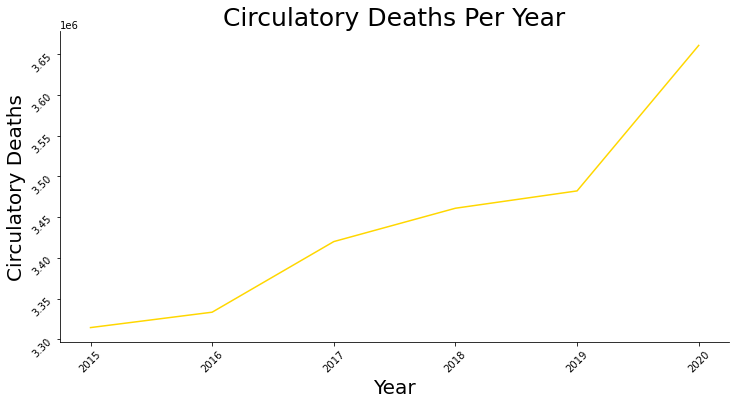

,Malignant
Year,
2015,2381810
2016,2390754
2017,2403926
2018,2404396
2019,2406090
2020,2415926


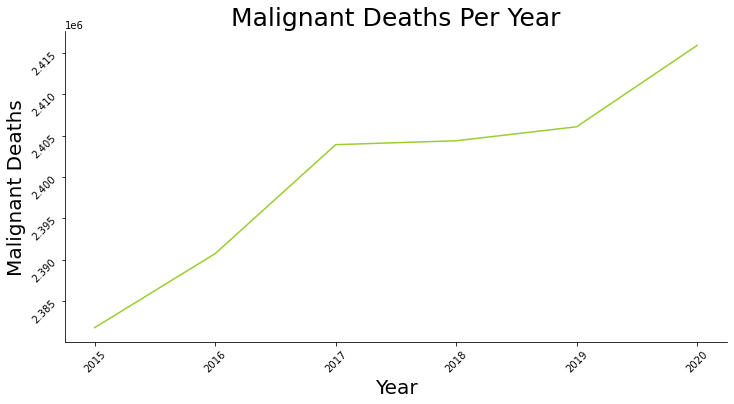

,Respiratory
Year,
2015,1062942
2016,1046110
2017,1100342
2018,1117264
2019,1068318
2020,1066075


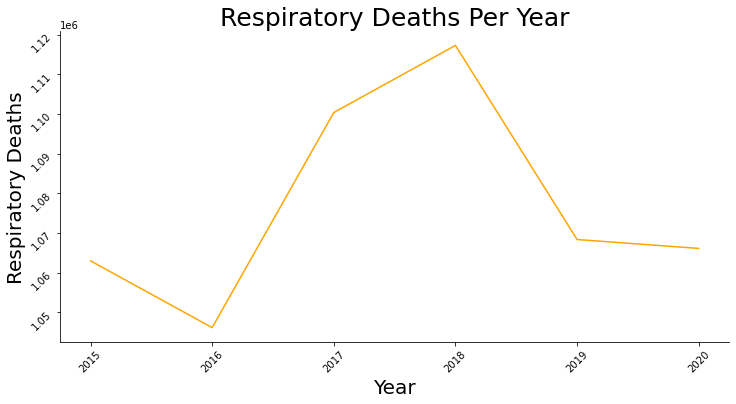

,Alzheimer
Year,
2015,978278
2016,994914
2017,1047324
2018,1067976
2019,1086700
2020,1219705


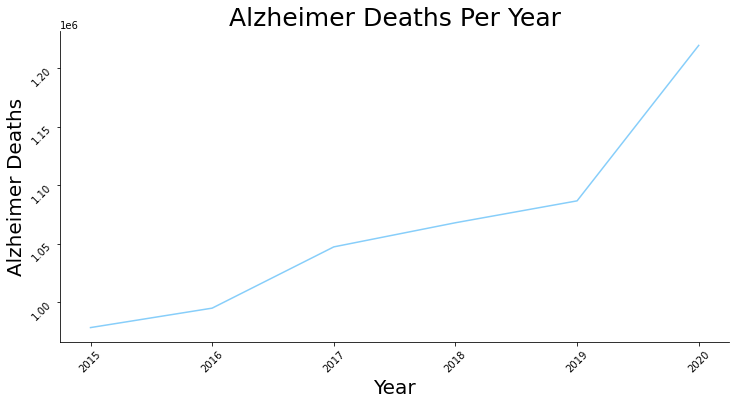

,Other
Year,
2015,650998
2016,653556
2017,674468
2018,682624
2019,684002
2020,743255


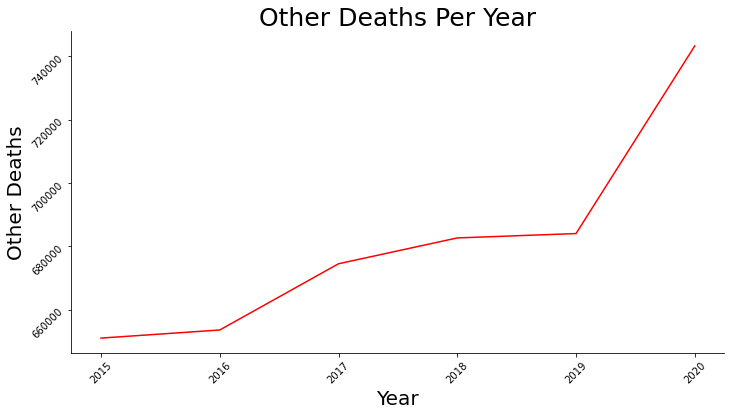

In [29]:
data_circulatory = pd.DataFrame([df_deathsCausePerYear['Year'], df_deathsCausePerYear['Circulatory']])
data_circulatory = data_circulatory.transpose().set_index('Year')
display(data_circulatory)
# Draw Plot
sns.relplot(x=data_circulatory.index, y='Circulatory', kind='line', height=5, aspect=2, color='gold', data=data_circulatory)
plt.title("Circulatory Deaths Per Year", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Circulatory Deaths", size=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

data_malignant = pd.DataFrame([df_deathsCausePerYear['Year'], df_deathsCausePerYear['Malignant']])
data_malignant = data_malignant.transpose().set_index('Year')
display(data_malignant)
# Draw Plot
sns.relplot(x=data_malignant.index, y='Malignant', kind = 'line', height=5, aspect=2, color='yellowgreen', data=data_malignant)
plt.title("Malignant Deaths Per Year", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Malignant Deaths", size=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

data_respiratory = pd.DataFrame([df_deathsCausePerYear['Year'], df_deathsCausePerYear['Respiratory']])
data_respiratory = data_respiratory.transpose().set_index('Year')
display(data_respiratory)
# Draw Plot
sns.relplot(x=data_respiratory.index, y='Respiratory', kind = 'line', height=5, aspect=2, color='orange', data=data_respiratory)
plt.title("Respiratory Deaths Per Year", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Respiratory Deaths", size=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

data_alzheimer = pd.DataFrame([df_deathsCausePerYear['Year'], df_deathsCausePerYear['Alzheimer']])
data_alzheimer = data_alzheimer.transpose().set_index('Year')
display(data_alzheimer)
# Draw Plot
sns.relplot(x=data_alzheimer.index, y='Alzheimer', kind = 'line', height=5, aspect=2, color='lightskyblue', data=data_alzheimer)
plt.title("Alzheimer Deaths Per Year", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Alzheimer Deaths", size=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

data_other = pd.DataFrame([df_deathsCausePerYear['Year'], df_deathsCausePerYear['Other']])
data_other = data_other.transpose().set_index('Year')
display(data_other)
# Draw Plot
sns.relplot(x=data_other.index, y='Other', kind = 'line', height=5, aspect=2, color='red', data=data_other)
plt.title("Other Deaths Per Year", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Other Deaths", size=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


### Deaths by jurisdiction

In [30]:
jurisdiction_deaths = data

index_to_drop = jurisdiction_deaths[(jurisdiction_deaths['State/territory'] == 'United States')].index

jurisdiction_deaths.drop(index_to_drop, inplace = True)
jurisdiction_deaths.head()


,State/territory,StateAbbreviation,Year,CauseGroup,NumberOfDeaths
0,Alabama,AL,2015,Alzheimer disease and dementia,120
1,Alabama,AL,2015,Alzheimer disease and dementia,120
2,Alabama,AL,2016,Alzheimer disease and dementia,76
3,Alabama,AL,2016,Alzheimer disease and dementia,76
4,Alabama,AL,2017,Alzheimer disease and dementia,96


### Total deaths by year and jurisdiction

In [31]:
yearJurisdiction_df = jurisdiction_deaths.groupby(['Year', 'State/territory']).sum()
yearJurisdiction_df


NumberOfDeaths
Year State/territory                
2015 Alabama                   77032
     Alaska                     2254
     Arizona                   79724
     Arkansas                  47900
     California               411494
...                              ...
2020 Virginia                 113637
     Washington                87051
     West Virginia             29333
     Wisconsin                 84521
     Wyoming                    3360

[318 rows x 1 columns]

### Total deaths by jurisdiction

In [32]:
jurisdiction_deaths = jurisdiction_deaths.groupby('State/territory').sum()
jurisdiction_deaths.drop('Year', axis = 1, inplace = True)
jurisdiction_deaths
jurisdiction_deaths.head()

,NumberOfDeaths
State/territory,
Alabama,492182
Alaska,13654
Arizona,518901
Arkansas,296365
California,2548245


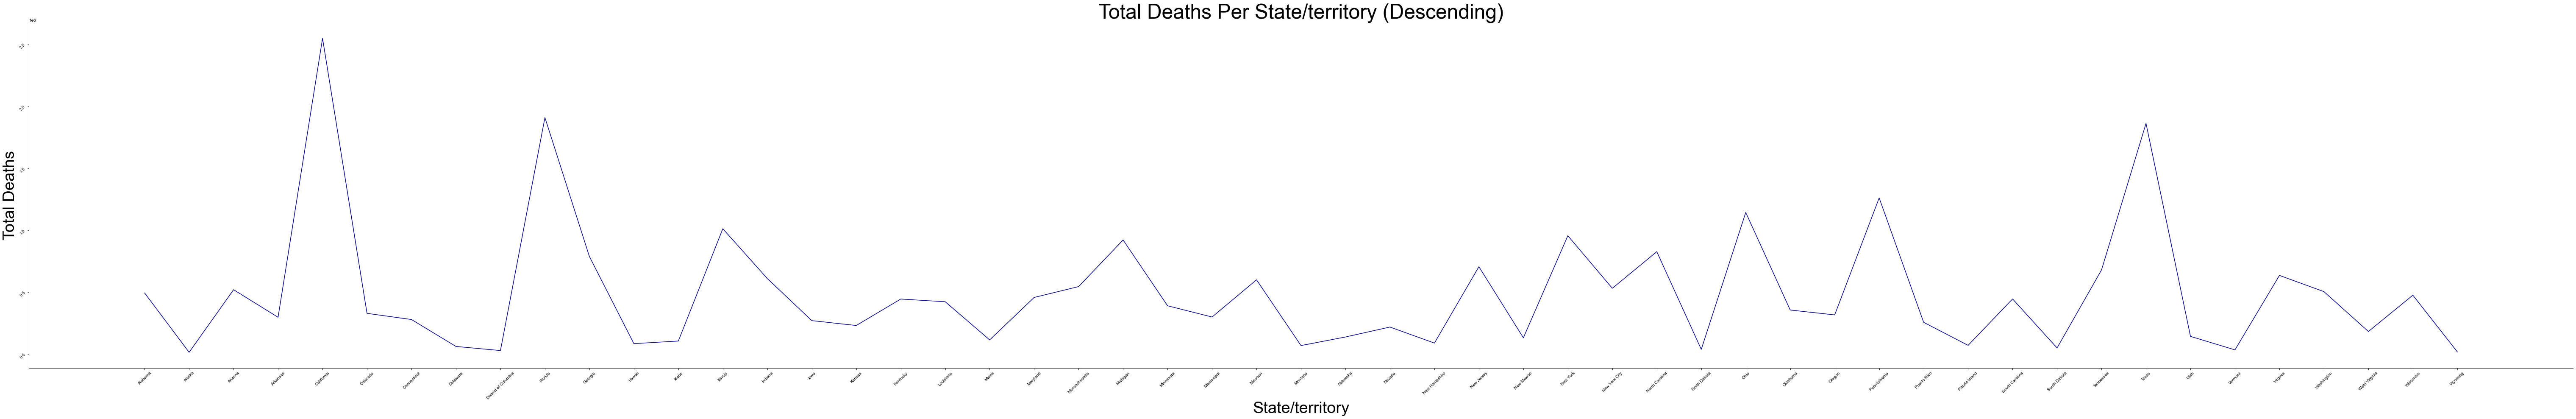

In [33]:
sns.relplot(x='State/territory', y='NumberOfDeaths', kind = 'line', height=12, aspect=7, color='darkblue', data=jurisdiction_deaths)
sns.set(font_scale = 3)
plt.title("Total Deaths Per State/territory (Descending)", size=48)
plt.xlabel("State/territory", size=38)
plt.ylabel("Total Deaths", size=38)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

### Total deaths by jurisdiction sorted from most to least

In [34]:
jurisdiction_deaths_sorted = jurisdiction_deaths.sort_values('NumberOfDeaths', ascending=False)
jurisdiction_deaths_sorted.head(10)

,NumberOfDeaths
State/territory,
California,2548245
Florida,1908728
Texas,1861608
Pennsylvania,1259968
Ohio,1142658
Illinois,1011281
New York,954933
Michigan,920491
North Carolina,826074


### 2020 deaths by jurisdiction sorted from most to least

In [35]:
jurisdiction_deaths2020_sorted = yearJurisdiction_df.loc[(2020)].sort_values('NumberOfDeaths', ascending=False)
jurisdiction_deaths2020_sorted.head(10)

,NumberOfDeaths
State/territory,
California,449439
Florida,342518
Texas,335766
Pennsylvania,214464
Ohio,198922
Illinois,178559
Michigan,164261
New York,164201
Georgia,142512


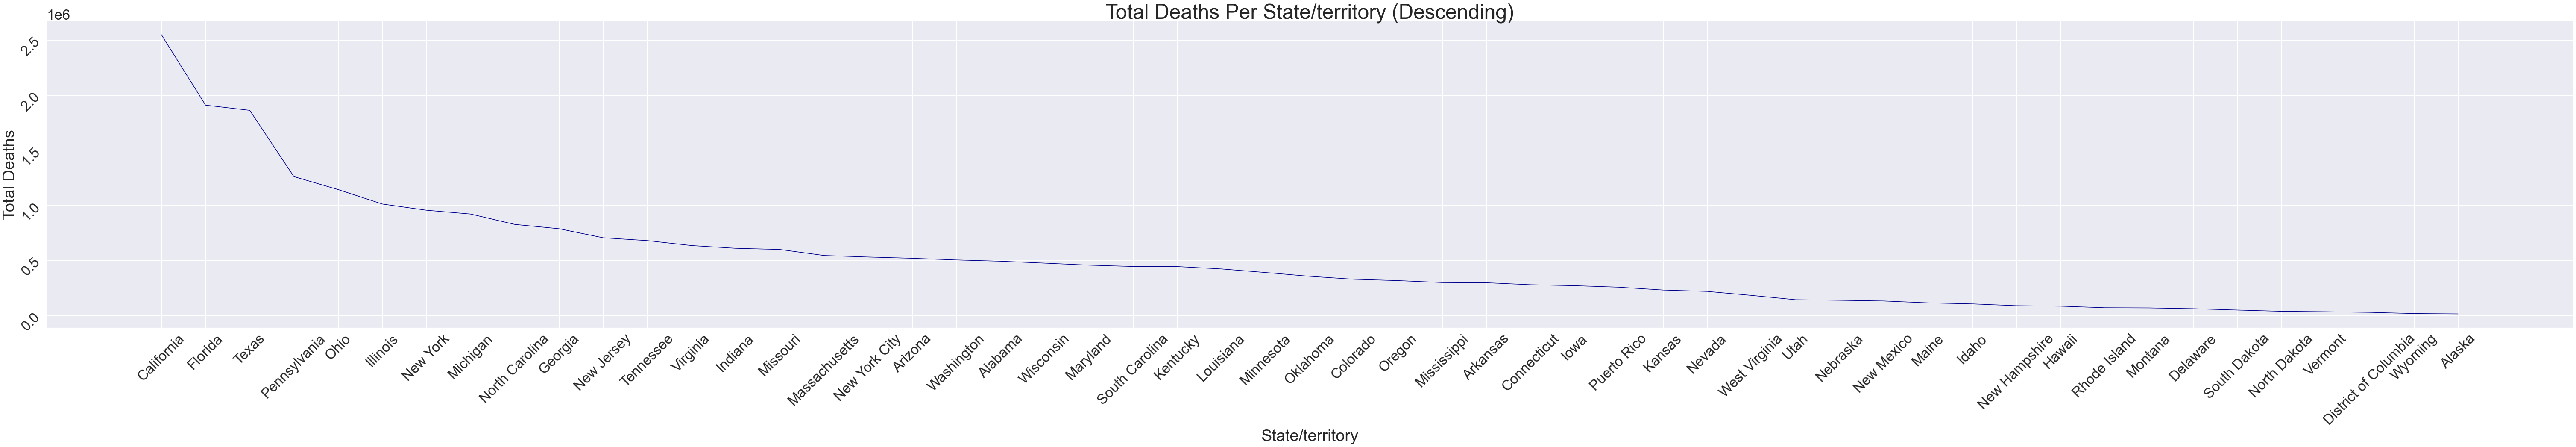

In [36]:
sns.relplot(x='State/territory', y='NumberOfDeaths', kind = 'line', height=12, aspect=7, color='darkblue', data=jurisdiction_deaths_sorted)
sns.set(font_scale = 3)
plt.title("Total Deaths Per State/territory (Descending)", size=48)
plt.xlabel("State/territory", size=38)
plt.ylabel("Total Deaths", size=38)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

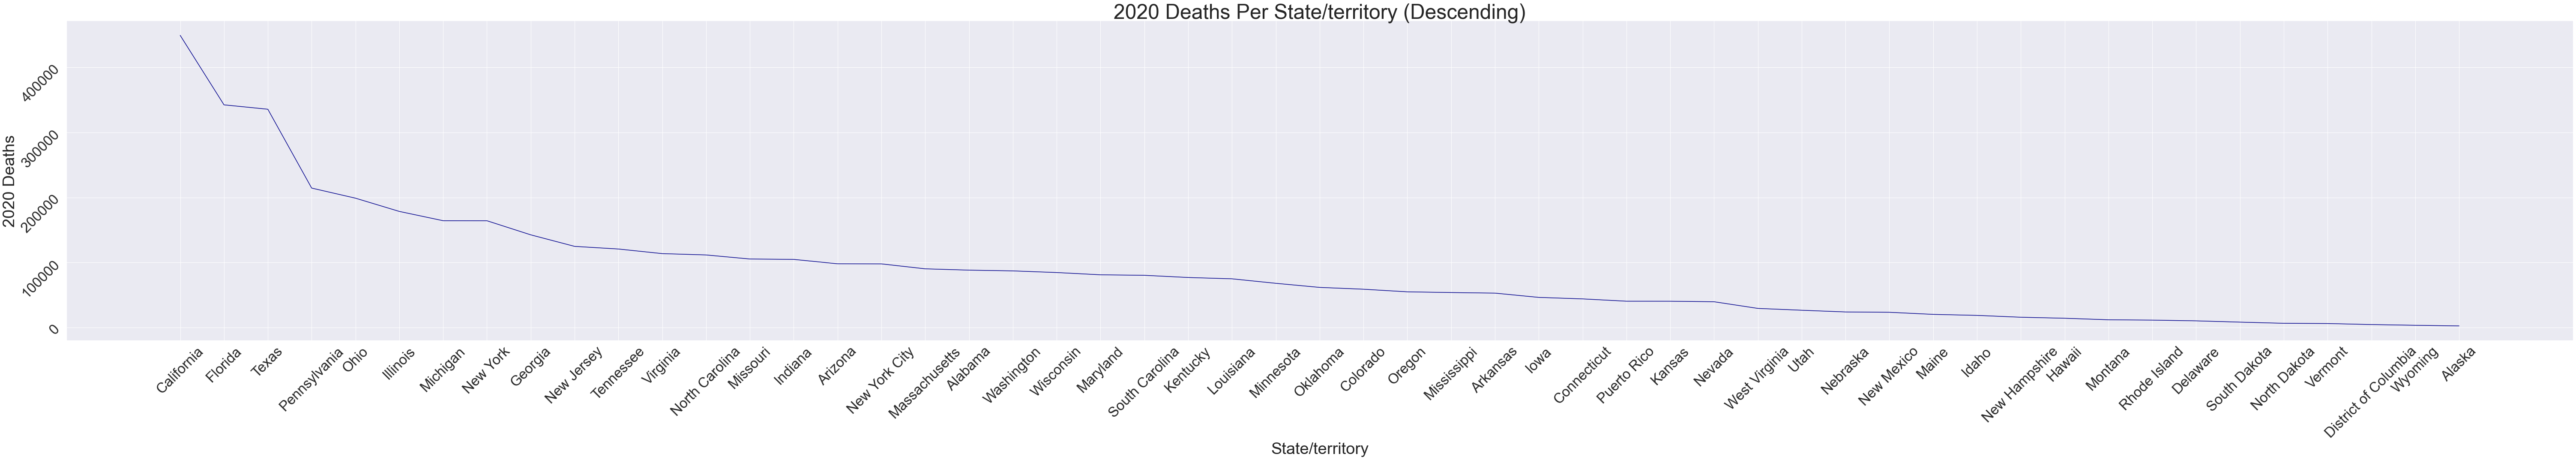

In [37]:
sns.relplot(x='State/territory', y='NumberOfDeaths', kind = 'line', height=12, aspect=7, color='darkblue', data=jurisdiction_deaths2020_sorted)
sns.set(font_scale = 3)
plt.title("2020 Deaths Per State/territory (Descending)", size=48)
plt.xlabel("State/territory", size=38)
plt.ylabel("2020 Deaths", size=38)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## Webscraping for State Lockdowns

In [38]:
# Cell to request and load the data
url = "https://en.wikipedia.org/wiki/U.S._state_and_local_government_responses_to_the_COVID-19_pandemic"

# Use pandas to webscrape wiki tables
tables = pd.read_html(url)

In [39]:
# Cell to extract and clean the table of restrictions

# Get the main table from the list
df_restrictions = tables[1]

# The original table has stacked column names, so we need to change that to a list
# Don't care about supertitle, so can just take subcolumn name.
new_columns = [col[1] for col in df_restrictions.columns]
df_restrictions.columns = new_columns

# Fix the column names that contain source numbers
# Also shorten names that can be shortened
df_restrictions.rename(columns={"Face coverings required in public[5]": "Masks required in public", \
                                "Bars & sit-down restaurants": "Restaurants"}, inplace=True)

# Remove columns: 
# "State/territory.1": extra state column because same as "State/territory" column
# "Stay at home ordered": because is contained in second table, in better format
# "Sources": Doesn't provide any useable information
df_restrictions.drop(["State/territory.1", "Stay at home ordered", "Sources"], axis=1, inplace=True)
df_restrictions

# Change datatypes of date columns to datetime
# Datetime only recognizes 0 padded numbers, so need to add 0 to strings
# Also, add the year 2020 to the string
def pad_emergency_dates(date):
    date = re.sub(r" ([0-9]{1}$)", r" 0\1", date)
    return date + ", 2020"

emergency_dates = df_restrictions["State of emergency declared"].apply(pad_emergency_dates)
df_restrictions["State of emergency declared"] = pd.to_datetime(emergency_dates, format="%B %d, %Y")

# Change datatypes of Yes/No columns to categorical
df_restrictions["Masks required in public"] = df_restrictions["Masks required in public"].astype("category")
df_restrictions["Gatherings banned"] = df_restrictions["Gatherings banned"].astype("category")
df_restrictions["Out-of-state travel restrictions"] = df_restrictions["Out-of-state travel restrictions"].astype("category")
df_restrictions["Schools"] = df_restrictions["Schools"].astype("category")
df_restrictions["Daycares"] = df_restrictions["Daycares"].astype("category")
df_restrictions["Restaurants"] = df_restrictions["Restaurants"].astype("category")
df_restrictions["Non-essential retail"] = df_restrictions["Non-essential retail"].astype("category")

In [40]:
# Cell to extract and clean the dates of lockdowns

# Get the table of lockdown ending dates
df_lockdown_dates = tables[2]

# Fix the Date for Wisconsin by removing source numbers
df_lockdown_dates["Date lifted"][22] = re.sub(r"\[[0-9]+\]+", "", df_lockdown_dates["Date lifted"][22])

# Change types of date columns in lockdown dataframe to datetime
df_lockdown_dates["Date enacted"] = pd.to_datetime(df_lockdown_dates["Date enacted"])
df_lockdown_dates["Date lifted"] = pd.to_datetime(df_lockdown_dates["Date lifted"])

In [49]:
# Cell to join the two tables

# Merge the two tables on by State
df = df_restrictions.merge(df_lockdown_dates, left_on="State/territory", right_on="State", how="left")
# Drop extra State column
df.drop(["State"], axis=1, inplace=True)
# Rename added columns
df.rename(columns={"Date enacated": "Lockdown enacted date", "Date lifted": "Lockdown lifted date"}, inplace=True)
df.head()

,State/territory,State of emergency declared,Masks required in public,Gatherings banned,Out-of-state travel restrictions,Schools,Daycares,Restaurants,Non-essential retail,Date enacted,Lockdown lifted date
0,Alabama,2020-03-13,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Yes,2020-04-04,2020-04-30
1,Alaska,2020-03-11,No,10 or more,Mandatory quarantine,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT
2,American Samoa,2020-01-29,No,10 or more,Travel suspended,Yes (remainder of term),Yes,No,No,NaT,NaT
3,Arizona,2020-03-11,No,50 or more,Limited quarantine,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT
4,Arkansas,2020-03-11,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Regional,NaT,NaT


In [50]:
# Save the dataframe as a pickle file
df.to_pickle("State_Lockdowns.pkl")

In [51]:
df.shape

(56, 11)

## Combine dataframes

In [63]:
stateDeaths_2020 = yearJurisdiction_df.loc[(2020)]

# Drop rows from df that the state/territory isn't in stateDeaths_2020
df.drop(df[df['State/territory'] == 'American Samoa'].index, inplace = True)
df.drop(df[df['State/territory'] == 'Guam'].index, inplace = True)
df.drop(df[df['State/territory'] == 'N. Mariana Islands'].index, inplace = True)

# death count columns to df
df['2020 Deaths'] = np.array(stateDeaths_2020['NumberOfDeaths'])
df['Total Deaths'] = np.array(jurisdiction_deaths['NumberOfDeaths'])
print(df.shape)
print(jurisdiction_deaths2020_sorted.shape)

(53, 13)
(53, 1)


In [68]:
df_mostTotalDeaths = df.sort_values('Total Deaths', ascending=False).head(10)

df_mostTotalDeaths

,State/territory,State of emergency declared,Masks required in public,Gatherings banned,Out-of-state travel restrictions,Schools,Daycares,Restaurants,Non-essential retail,Date enacted,Lockdown lifted date,2020 Deaths,Total Deaths
5,California,2020-03-04,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,449439,2548245
10,Florida,2020-03-01,No,10 or more,Limited quarantine / Screened,Yes (remainder of term),Yes,Yes,Yes,2020-04-03,2020-05-04,342518,1908728
48,Utah,2020-03-06,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Regional,NaT,NaT,335766,1861608
42,Puerto Rico,2020-03-12,No,All,Screened,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,214464,1259968
39,Oklahoma,2020-03-15,No,11 or more,Limited quarantine,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,198922,1142658
15,Illinois,2020-03-09,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,2020-03-21,2020-05-30,178559,1011281
34,New York,2020-03-07,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,164201,954933
24,Michigan,2020-03-11,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,2020-03-24,2020-06-02,164261,920491
36,North Dakota,2020-03-13,No,50 or more,Mandatory quarantine,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,111580,826074
11,Georgia,2020-03-14,No,10 or more,No,Yes (remainder of term),No,Yes,Yes,2020-04-03,2020-04-30,142512,786982


In [73]:
df_mostDeaths2020 = df.sort_values('2020 Deaths', ascending=False).head(10)

df_mostDeaths2020

,State/territory,State of emergency declared,Masks required in public,Gatherings banned,Out-of-state travel restrictions,Schools,Daycares,Restaurants,Non-essential retail,Date enacted,Lockdown lifted date,2020 Deaths,Total Deaths
5,California,2020-03-04,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,449439,2548245
10,Florida,2020-03-01,No,10 or more,Limited quarantine / Screened,Yes (remainder of term),Yes,Yes,Yes,2020-04-03,2020-05-04,342518,1908728
48,Utah,2020-03-06,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Regional,NaT,NaT,335766,1861608
42,Puerto Rico,2020-03-12,No,All,Screened,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,214464,1259968
39,Oklahoma,2020-03-15,No,11 or more,Limited quarantine,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,198922,1142658
15,Illinois,2020-03-09,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,2020-03-21,2020-05-30,178559,1011281
24,Michigan,2020-03-11,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,2020-03-24,2020-06-02,164261,920491
34,New York,2020-03-07,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,164201,954933
11,Georgia,2020-03-14,No,10 or more,No,Yes (remainder of term),No,Yes,Yes,2020-04-03,2020-04-30,142512,786982
32,New Jersey,2020-03-09,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,2020-03-21,2020-06-09,124781,704821


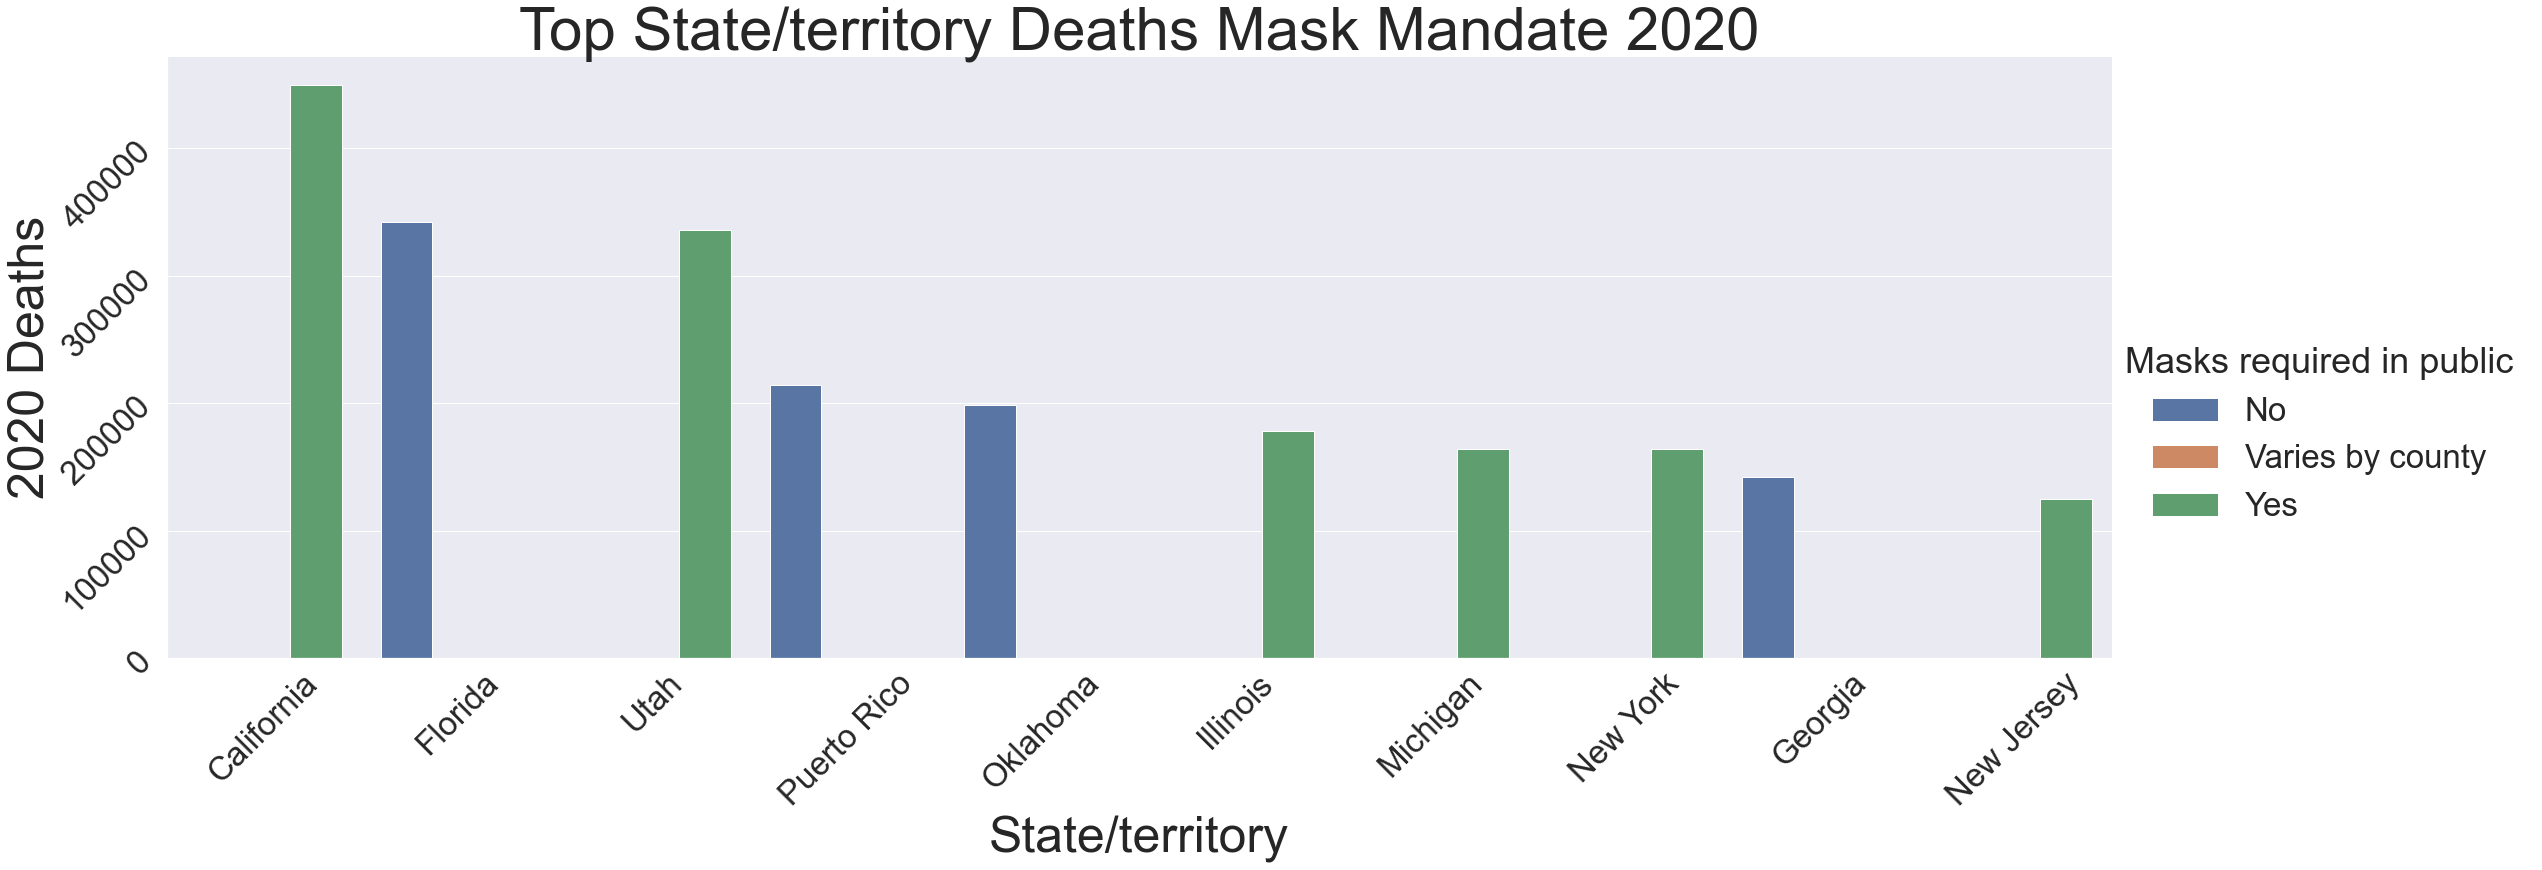

In [74]:
sns.catplot(x='State/territory', y='2020 Deaths', hue='Masks required in public', kind='bar', height=10, aspect=3, data=df_mostDeaths2020)
plt.title('Top State/territory Deaths Mask Mandate 2020', size=60)
plt.xlabel('State/territory', size=50)
plt.ylabel('2020 Deaths', size=50)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

From the chart above of the top 10 states/territories with the most deaths in 2020, mask mandates did not matter. The top state (California) required masks in public and the second top state did not require masks in public.

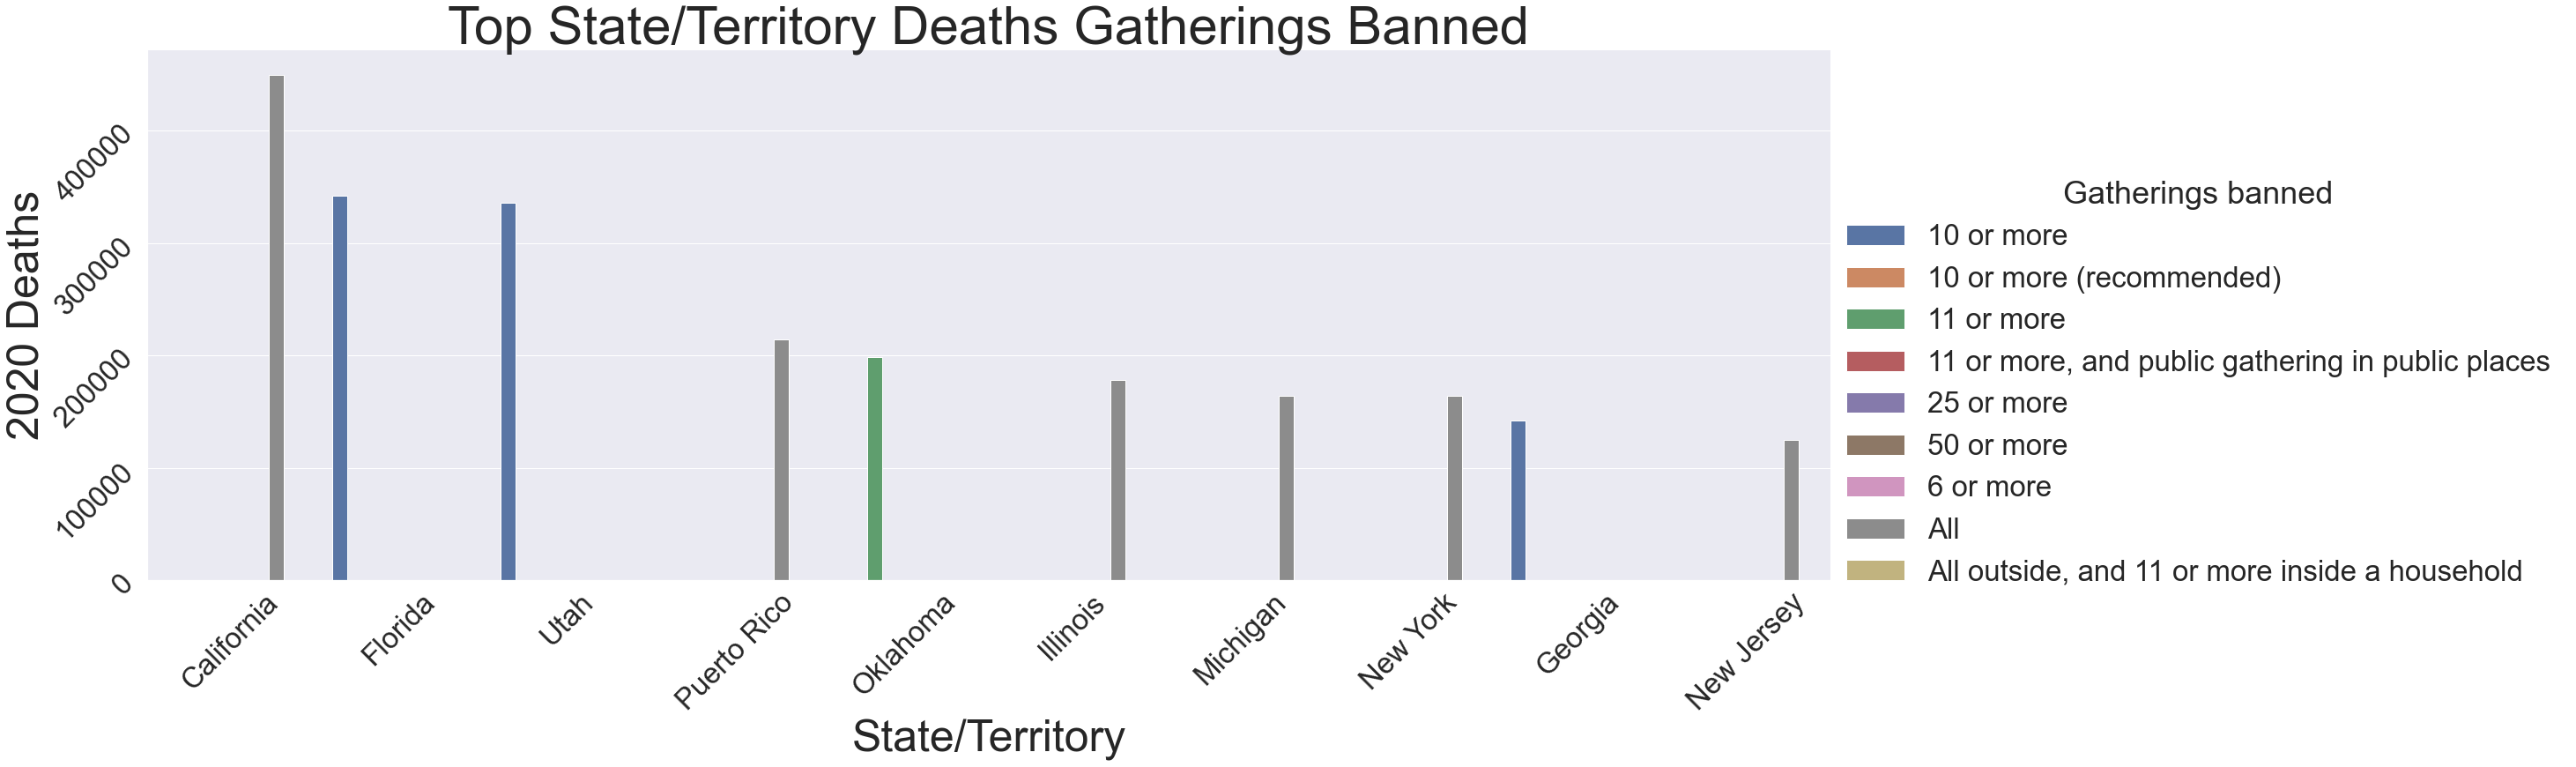

In [77]:
sns.catplot(x='State/territory', y='2020 Deaths', hue='Gatherings banned', kind='bar', height=10, aspect=3, data=df_mostDeaths2020)
plt.title('Top State/Territory Deaths Gatherings Banned', size=60)
plt.xlabel('State/Territory', size=50)
plt.ylabel('2020 Deaths', size=50)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()